# The Data
The data that the TensorFlow 2.0 beginner tutorial uses is the MNIST dataset which is considered a kind of “Hello, World!” for neural networks and deep learning, and it can be downloaded directly from Keras. It is a dataset full of hand-drawn digits ranging from 0–9 with a corresponding label describing what digit the drawing is supposed to be depicting.

Using TensorFlow backend.


11493376/11490434 [==============================] - 46s 4us/step
5


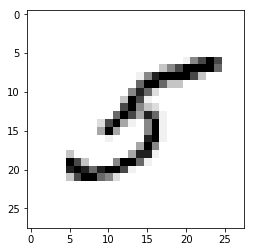

(60000, 28, 28)
(10000, 28, 28)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_index = 35
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

print(x_train.shape)
print(x_test.shape)

train data : 6만개 / test data : 1만개 / 28 x 28

In [2]:
from keras.utils import to_categorical
num_classes = 10

print(y_train[:image_index + 1])
y_train = to_categorical(y_train, num_classes)
print(y_train[:image_index + 1])
y_test = to_categorical(y_test, num_classes)

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [

# 1. Mnist Training with MLP (Multi Layer Perceptron)
We want to create a classifier that classifies MNIST handwritten image into its digit. In other words, classifier will get array which represents MNIST image as input and outputs its label.

In [3]:
# https://towardsdatascience.com/beginners-guide-to-building-neural-networks-in-tensorflow-dab7a09b941d
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') # output : 0~9
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)
model.evaluate(x_test, y_test)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2986 - acc: 0.9131
Epoch 2/3
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1461 - acc: 0.9578
Epoch 3/3
10000/10000 [==============================] - 1s 57us/sample - loss: 0.0865 - acc: 0.9746


[0.08646690034130589, 0.9746]

# 2. Mnist Training with Convolutional Neural Network (CNN) 
The basic CNN structure is as follows: Convolution -> Pooling -> Convolution -> Pooling -> Fully Connected Layer -> Output
Convolution is the act of taking the original data, and creating feature maps from it.Pooling is down-sampling, most often in the form of "max-pooling," where we select a region, and then take the maximum value in that region, and that becomes the new value for the entire region. Fully Connected Layers are typical neural networks, where all nodes are "fully connected." The convolutional layers are not fully connected like a traditional neural network.

In [4]:
# https://www.sitepoint.com/keras-digit-recognition-tutorial/
# https://victorzhou.com/blog/keras-cnn-tutorial/
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

num_filters = 8
filter_size = 3

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=2), Flatten(), Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  'adam', loss='categorical_crossentropy', metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images, to_categorical(train_labels), epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)



Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 23s 391us/step - loss: 0.3525 - accuracy: 0.8979 - val_loss: 0.2229 - val_accuracy: 0.9357- loss:
Epoch 2/3
60000/60000 [==============================] - 21s 350us/step - loss: 0.1847 - accuracy: 0.9468 - val_loss: 0.1426 - val_accuracy: 0.9577
Epoch 3/3
60000/60000 [==============================] - 22s 359us/step - loss: 0.1253 - accuracy: 0.9642 - val_loss: 0.1071 - val_accuracy: 0.9695


# 3. Mnist Training with RNN and LSTM
We will demonstrate how to use recurrent neural network to predict the handwritten digits MNIST.

In [5]:
# https://www.kaggle.com/muhammedfathi/mnist-with-rnn-and-lstm
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM

# Training parameters.
num_classes = 10

# Embedding dimensions.
row_hidden = 128
col_hidden = 128

# The data, split between train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

row, col, pixel = x_train.shape[1:]
# 4D input.
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training.
model.fit(
    x_train, y_train, batch_size=32, epochs=2, verbose=1, 
    validation_data=(x_test, y_test))

# Evaluation.
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1394s 23ms/step - loss: 0.4606 - accuracy: 0.8464 - val_loss: 0.1044 - val_accuracy: 0.9677
Epoch 2/2
60000/60000 [==============================] - 1334s 22ms/step - loss: 0.1141 - accuracy: 0.9653 - val_loss: 0.0994 - val_accuracy: 0.9697
Test loss: 0.09939058846533298
Test accuracy: 0.9696999788284302
